## Homework 3
October 7, 2022<br>
Vivian Lin<br>
ID: 6043749830<br>
Dr. Mohammad Rajati

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import bootstrap
from matplotlib import pyplot as plt

/Users/vivianlin/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<b>1. Time Series Classification Part 1: Feature Creation/Extraction<br>
a) Download the AReM data from: https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+system+based+on+Multisensor+data+fusion+\%28AReM\%29 <br>
Frequency (Hz): 20
Clock (millisecond): 250
Duration (seconds): 120</b>

In [2]:
# Read all 7 csv files in bending1 folder.
bending1 = ["dataset" + str(x) for x in range(1, 8)]
b1_df = []

for i in range(len(bending1)):
    temp = pd.read_csv("../data/AReM/bending1/" + bending1[i] + ".csv", skiprows=3, header=1)
    temp.rename(columns={"# Columns: time": "time"}, inplace=True)
    temp["type"] = "bending1"
    if temp.isnull().values.any() or temp.shape[0] != 480:
        print(f"Data cleaning required in bending1: {bending1[i]}")
    b1_df.append(temp)

# Read all 6 csv files in bending1 folder.
bending2 = ["dataset" + str(x) for x in range(1, 7)]
b2_df = []

for i in range(len(bending2)):
    temp = pd.read_csv("../data/AReM/bending2/" + bending2[i] + ".csv", skiprows=3, header=1)
    temp.rename(columns={"# Columns: time": "time"}, inplace=True)
    temp["type"] = "bending2"
    if temp.isnull().values.any() or temp.shape[0] != 480:
        print(f"Data cleaning required in bending2: {bending2[i]}")
    b2_df.append(temp)

# Read all 15 csv files in cycling folder.
# Manual data cleaning to remove extra comma at end of cycling dataset9 and dataset14.
cycling = ["dataset" + str(x) for x in range(1, 16)]
c_df = []

for i in range(len(cycling)):
    temp = pd.read_csv("../data/AReM/cycling/" + cycling[i] + ".csv", skiprows=3, header=1)
    temp.rename(columns={"# Columns: time": "time"}, inplace=True)
    temp["type"] = "cycling"
    if temp.isnull().values.any() or temp.shape[0] != 480:
        print(f"Data cleaning required in cycling: {cycling[i]}")
    c_df.append(temp)

# Read all 15 csv files in lying folder.
lying = ["dataset" + str(x) for x in range(1, 16)]
l_df = []

for i in range(len(lying)):
    temp = pd.read_csv("../data/AReM/lying/" + lying[i] + ".csv", skiprows=3, header=1)
    temp.rename(columns={"# Columns: time": "time"}, inplace=True)
    temp["type"] = "lying"
    if temp.isnull().values.any() or temp.shape[0] != 480:
        print(f"Data cleaning required in lying: {lying[i]}")
    l_df.append(temp)

# Read all 15 csv files in sitting folder.
sitting = ["dataset" + str(x) for x in range(1, 16)]
si_df = []

for i in range(len(sitting)):
    temp = pd.read_csv("../data/AReM/sitting/" + sitting[i] + ".csv", skiprows=3, header=1)
    temp.rename(columns={"# Columns: time": "time"}, inplace=True)
    temp["type"] = "sitting"
    if temp.isnull().values.any() or temp.shape[0] != 480:
        print(f"Data cleaning required in sitting: {sitting[i]}")
    si_df.append(temp)

# Read all 15 csv files in standing folder.
standing = ["dataset" + str(x) for x in range(1, 16)]
st_df = []

for i in range(len(standing)):
    temp = pd.read_csv("../data/AReM/standing/" + standing[i] + ".csv", skiprows=3, header=1)
    temp.rename(columns={"# Columns: time": "time"}, inplace=True)
    temp["type"] = "standing"
    if temp.isnull().values.any() or temp.shape[0] != 480:
        print(f"Data cleaning required in standing: {standing[i]}")
    st_df.append(temp)

# Read all 15 csv files in walking folder.
walking = ["dataset" + str(x) for x in range(1, 16)]
w_df = []

for i in range(len(walking)):
    temp = pd.read_csv("../data/AReM/walking/" + walking[i] + ".csv", skiprows=3, header=1)
    temp.rename(columns={"# Columns: time": "time"}, inplace=True)
    temp["type"] = "walking"
    if temp.isnull().values.any() or temp.shape[0] != 480:
        print(f"Data cleaning required in walking: {walking[i]}")
    w_df.append(temp)


Data cleaning required in bending2: dataset4
Data cleaning required in sitting: dataset8


In [3]:
# Data clean for bending2 dataset4
# Manually cleaned up bending2 dataset4 such that the header row matches the rest of the data (white-space separated).
temp = pd.read_csv("../data/AReM/bending2/dataset4.csv", delim_whitespace=True)
temp.rename(columns={"# Columns: time": "time"}, inplace=True)
temp["type"] = "bending2"
print(temp.isnull().values.any())
print(temp.shape[0] != 480)
b2_df[3] = temp

# Data clean is not required for sitting dataset8 since it is missing one row, making this the only dataframe with 479 rows instead of 480.
si_df[7].shape

False
False


(479, 8)

<b>b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.<b>

In [4]:
test = []
train = []

# For bending1 and bending2, only dataset1 and dataset2 are test data.
df_name = [b1_df, b2_df]
dataset = [0, 1]
for name in df_name:
    for i in range(len(name)):
        if i in dataset:
            test.append(name[i])
        else:
            train.append(name[i])

# For the rest, dataset1, dataset2, and dataset3 are test data.
df_name = [c_df, l_df, si_df, st_df, w_df]
dataset = [0, 1, 2]
for name in df_name:
    for i in range(len(name)):
        if i in dataset:
            test.append(name[i])
        else:
            train.append(name[i])

print(len(test), len(train))

19 69


<b>c) Feature Extraction: Classification of time series usually needs extracting features from them. In this problem, we focus on time-domain features.<br>
ci) Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc)</b>

In [5]:
print("Ans: According to Refernce #1, simple statistical features, such as minimum, maximum, mean, median, and standard deviation are commonly used. In addition, frequency and variance are also common features used in time series classification.")
print("Upon further research, Reference #2 states that feature extraction in time series classification uses \"correlation structure, distribution, entropy, stationarity and scaling properties\" that are derived using scientific time series analysis.")

Ans: According to Refernce #1, simple statistical features, such as minimum, maximum, mean, median, and standard deviation are commonly used. In addition, frequency and variance are also common features used in time series classification.
Upon further research, Reference #2 states that feature extraction in time series classification uses "correlation structure, distribution, entropy, stationarity and scaling properties" that are derived using scientific time series analysis.


<b>cii) Extract time-domain features min, max, mean, median, stdev, first quartile, and third quartile for all 6 time series in each instance. Free to normalize/standardize features or use them directly.<br>
Using features directly:</b>

In [6]:
data_name = [b1_df, b2_df, c_df, l_df, si_df, st_df, w_df]

min1, min2, min3, min4, min5, min6 = [], [], [], [], [], []
max1, max2, max3, max4, max5, max6 = [], [], [], [], [], []
mean1, mean2, mean3, mean4, mean5, mean6  = [], [], [], [], [], []
med1, med2, med3, med4, med5, med6 = [], [], [], [], [], []
stdev1, stdev2, stdev3, stdev4, stdev5, stdev6 = [], [], [], [], [], []
fq1, fq2, fq3, fq4, fq5, fq6 = [], [], [], [], [], []
tq1, tq2, tq3, tq4, tq5, tq6 = [], [], [], [], [], []
type_df = []
instance = [x for x in range(1, 89)]

# Loop through all 7 folders.
for name in data_name:
    # Loop through all 88 instances.
        for i in range(len(name)):
            type_df.append(name[i]['type'][0])
            
            # Extract all means.
            mean1.append(name[i].describe().iloc[1, 1])
            mean2.append(name[i].describe().iloc[1, 2])
            mean3.append(name[i].describe().iloc[1, 3])
            mean4.append(name[i].describe().iloc[1, 4])
            mean5.append(name[i].describe().iloc[1, 5])
            mean6.append(name[i].describe().iloc[1, 6])

            # Extract all std.
            stdev1.append(name[i].describe().iloc[2, 1])
            stdev2.append(name[i].describe().iloc[2, 2])
            stdev3.append(name[i].describe().iloc[2, 3])
            stdev4.append(name[i].describe().iloc[2, 4])
            stdev5.append(name[i].describe().iloc[2, 5])
            stdev6.append(name[i].describe().iloc[2, 6])
            
            # Extract all minimums.
            min1.append(name[i].describe().iloc[3, 1])
            min2.append(name[i].describe().iloc[3, 2])
            min3.append(name[i].describe().iloc[3, 3])
            min4.append(name[i].describe().iloc[3, 4])
            min5.append(name[i].describe().iloc[3, 5])
            min6.append(name[i].describe().iloc[3, 6])
            
            # Extract all 1st quartiles.
            fq1.append(name[i].describe().iloc[4, 1])
            fq2.append(name[i].describe().iloc[4, 2])
            fq3.append(name[i].describe().iloc[4, 3])
            fq4.append(name[i].describe().iloc[4, 4])
            fq5.append(name[i].describe().iloc[4, 5])
            fq6.append(name[i].describe().iloc[4, 6])

            # Extract all medians.
            med1.append(name[i].describe().iloc[5, 1])
            med2.append(name[i].describe().iloc[5, 2])
            med3.append(name[i].describe().iloc[5, 3])
            med4.append(name[i].describe().iloc[5, 4])
            med5.append(name[i].describe().iloc[5, 5])
            med6.append(name[i].describe().iloc[5, 6])

            # Extract all 1st quartiles.
            tq1.append(name[i].describe().iloc[6, 1])
            tq2.append(name[i].describe().iloc[6, 2])
            tq3.append(name[i].describe().iloc[6, 3])
            tq4.append(name[i].describe().iloc[6, 4])
            tq5.append(name[i].describe().iloc[6, 5])
            tq6.append(name[i].describe().iloc[6, 6])

            # Extract all maximums.
            max1.append(name[i].describe().iloc[7, 1])
            max2.append(name[i].describe().iloc[7, 2])
            max3.append(name[i].describe().iloc[7, 3])
            max4.append(name[i].describe().iloc[7, 4])
            max5.append(name[i].describe().iloc[7, 5])
            max6.append(name[i].describe().iloc[7, 6])



In [7]:
td_dict = {'instance': instance, 'min1': min1, 'max1': max1, 'mean1': mean1, 'median1': med1, 'stdev1': stdev1, '1st quart1': fq1, '3rd quart1': tq1,
            'min2': min2, 'max2': max2, 'mean2': mean2, 'median2': med2, 'stdev2': stdev2, '1st quart2': fq2, '3rd quart2': tq2,
            'min3': min3, 'max3': max3, 'mean3': mean3, 'median3': med3, 'stdev3': stdev3, '1st quart3': fq3, '3rd quart3': tq3,
            'min4': min4, 'max4': max4, 'mean4': mean4, 'median4': med4, 'stdev4': stdev4, '1st quart4': fq4, '3rd quart4': tq4,
            'min5': min5, 'max5': max5, 'mean5': mean5, 'median5': med5, 'stdev5': stdev5, '1st quart5': fq5, '3rd quart5': tq5,
            'min6': min6, 'max6': max6, 'mean6': mean6, 'median6': med6, 'stdev6': stdev6, '1st quart6': fq6, '3rd quart6': tq6, 'type': type_df
        }
td_features = pd.DataFrame(data=td_dict)
td_features.set_index('instance', inplace=True)
print(td_features.shape)
td_features.head(5)


(88, 43)


,min1,max1,mean1,median1,stdev1,1st quart1,3rd quart1,min2,max2,mean2,...,1st quart5,3rd quart5,min6,max6,mean6,median6,stdev6,1st quart6,3rd quart6,type
instance,,,,,,,,,,,,,,,,,,,,,
1,37.25,45.00,40.624792,40.50,1.476967,39.25,42.00,0.0,1.30,0.358604,...,33.0000,36.00,0.0,1.92,0.570583,0.43,0.582915,0.0,1.30,bending1
2,38.00,45.67,42.812812,42.50,1.435550,42.00,43.67,0.0,1.22,0.372437,...,32.0000,34.50,0.0,3.11,0.571083,0.43,0.601010,0.0,1.30,bending1
3,35.00,47.40,43.954500,44.33,1.558835,43.00,45.00,0.0,1.70,0.426250,...,35.3625,36.50,0.0,1.79,0.493292,0.43,0.513506,0.0,0.94,bending1
4,33.00,47.75,42.179812,43.50,3.670666,39.15,45.00,0.0,3.00,0.696042,...,30.4575,36.33,0.0,2.18,0.613521,0.50,0.524317,0.0,1.00,bending1
5,33.00,45.75,41.678063,41.75,2.243490,41.33,42.75,0.0,2.83,0.535979,...,28.4575,31.25,0.0,1.79,0.383292,0.43,0.389164,0.0,0.50,bending1


<b>ciii) Estimate standard deviation of each of the time-domain features you extracted from the data. Then, use Python's bootstrapped or any other method to build a 90% bootstrap confidence interval for the standard deviation of each feature.</b>

In [8]:
# Standard deviation of each time-domain features extracted.
std_features = td_features.iloc[:,:44].describe().iloc[2]

In [9]:
# Bootstrap method.

col_names = td_features.columns[:42]
st_ci = {}

# Calculate for the 90% confidence interval for standard deviation of each feature.
for col in col_names:
    tmp = (td_features[col],)
    bt_ci = bootstrap(tmp, np.std, confidence_level=0.9, method='basic')
    st_ci[col] = [bt_ci.confidence_interval[0], bt_ci.confidence_interval[1]]

# Display the low and high of the confidence interval in dataframe.
bts_table = pd.DataFrame(st_ci, index=['CI_low', 'CI_high'])
# Add in a row with standard deviation as calculated from describe() function.
bts_table.loc[2] = std_features
bts_table.rename(index={2: 'std'}, inplace=True)
bts_table

,min1,max1,mean1,median1,stdev1,1st quart1,3rd quart1,min2,max2,mean2,...,stdev5,1st quart5,3rd quart5,min6,max6,mean6,median6,stdev6,1st quart6,3rd quart6
CI_low,8.307559,3.488035,4.758897,4.842326,1.584153,5.623722,4.412103,0.0,4.696349,1.432853,...,0.828155,4.951536,4.535758,0.013125,2.261717,1.088287,1.018704,0.487440,0.704335,1.436098
CI_high,10.824409,5.405040,5.924526,6.045080,1.958548,6.692874,5.912338,0.0,5.463165,1.740340,...,1.232952,7.366739,6.672400,0.091154,2.776781,1.241826,1.172491,0.553985,0.822102,1.634276
std,9.569975,4.394362,5.335718,5.440054,1.772153,6.153590,5.138925,0.0,5.062729,1.574164,...,1.024898,6.096465,5.531720,0.045838,2.518921,1.154812,1.086474,0.517617,0.758584,1.523599


<b>civ) Select three most important time-domain features.</b>

In [10]:
print("Ans: I think mean, median, and standard deviation are the best time-domain features because by comparing mean and median, we can estimate the skewness in the data and from standard deviation, we can understand how much the data varies from time series instance to another. In addition, according to Reference 2, one of the common features used for feature extraction in time series classification is distribution.")

Ans: I think mean, median, and standard deviation are the best time-domain features because by comparing mean and median, we can estimate the skewness in the data and from standard deviation, we can understand how much the data varies from time series instance to another. In addition, according to Reference 2, one of the common features used for feature extraction in time series classification is distribution.


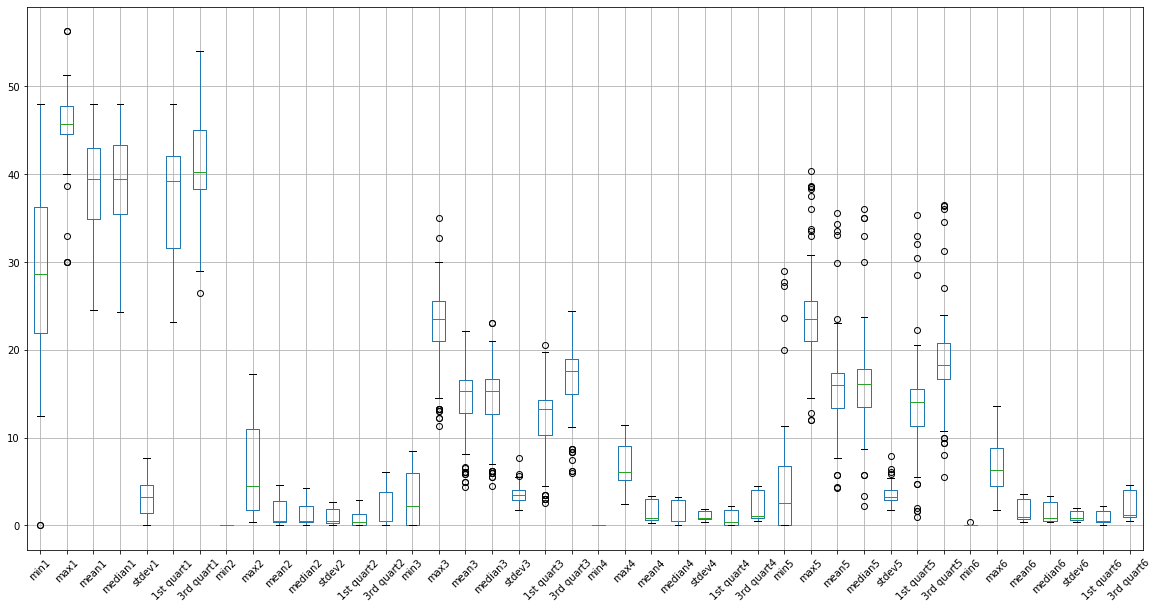

In [11]:
td_features_only = td_features.iloc[:, :42]
plt.figure(figsize=(20,10))
td_features_only.boxplot()
plt.xticks(rotation =45)
plt.show()

<b>2. ISLR 3.7.4<br>
A set of data (n=100 observations) containing single predictor and a quantitative response. Data is fitted to a linear regression model and a separate cubic regression, ie Y = β0 +β1X +β2X2 +β3X3 +ε.<br>
a) Suppose true relationship between X and Y is linear. Consider training residual sum of squares (RSS) for linear regression, and also the training RSS for the cubic regression. Would one be lower than the other, the same, or not enough info to tell? Justify answer.</b>

Ans: The training RSS for the <u>cubic regression</u> will be <u>lower</u> than or <u>close to the same</u> training RSS for the <u>linear regression</u>. RSS is the sum of residual squared  (y-yhat)^2, so it measures the fit of the model. The cubic regression may results in over-fitting in this case since the true relatinoship between X and Y is linear. This over-fitting may reduce the training RSS in the cubic regression, making it a better 'fit' for the training data. However, since we know that the true relationshhip between X and Y is linear, the extra fit provided by the cubic regression may not matter.

<b>b) Answer a) using test rather than training RSS.</b>

Ans: The testing RSS for the <u>linear regression</u> will be <u>lower</u> than the testing RSS for the <u>cubic regression</u> because the cubic regression is over-fitting the data and will increase testing error because the true relationship is linear. Although the β coefficients (β2 and β3) can be low for the higher order terms (X2 and X3), the RSS of the testing will still be higher than the RSS from linear regression model as we know the true relationship is linear. 

<b>c) Suppose true relationship between X and Y is not linear, but we don't know how far it is from linear. Consider training RSS for linear regression and training RSS for cubic regression. Would one be lower than the other, the same or not enough info to tell? Justify answer.</b>

Ans: The training RSS for <u>cubic regression</u> will be <u>lower</u> than the training RSS for the <u>linear regression</u> because a cubic regression is more flexible than a linear regression. For the training data, a more flexible model will yield a lower RSS.

<b>d) Answer c) using test rather than training RSS.</b>

Ans: Since we don't know the true relationship between X and Y, there's really no way for us to determine whether the linear regression or the cubic regression will provide a better fit. If the true relationship is closer to linear than to a cubic regression, then the test RSS for linear regression will be lower than that of cubic. However, if the true relationship is of a higher degree polynomial, then the test RSS for cubic regression will be lower than that of linear. However, no such information is provided. Hence, we <u>need more information</u> on the true relationship of the data to determine whether one testing RSS will be lower than the other.

<b>References:<br></b>
1. https://stats.stackexchange.com/questions/50807/features-for-time-series-classification
2. https://medium.datadriveninvestor.com/time-series-classification-using-feature-extraction-16209570a22e
3. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html